# Lecture 13
### Principal component analysis (PCA)

PCA is a method to reduce dimensionality in data. It is a linear transformation such that most of the variation can be explained by fewer dimensions than the original data. But it is very useful only if the components are linearly correlated.

Further reading:
- https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
- https://mathvoices.ams.org/featurecolumn/2021/08/01/principal-component-analysis/

In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import eig
import seaborn as sns

In [2]:
iris = pd.read_csv('./Data/iris.csv')

If we look at the data there are 4 dimensions but we can see that some of these plots seems similar to each other.

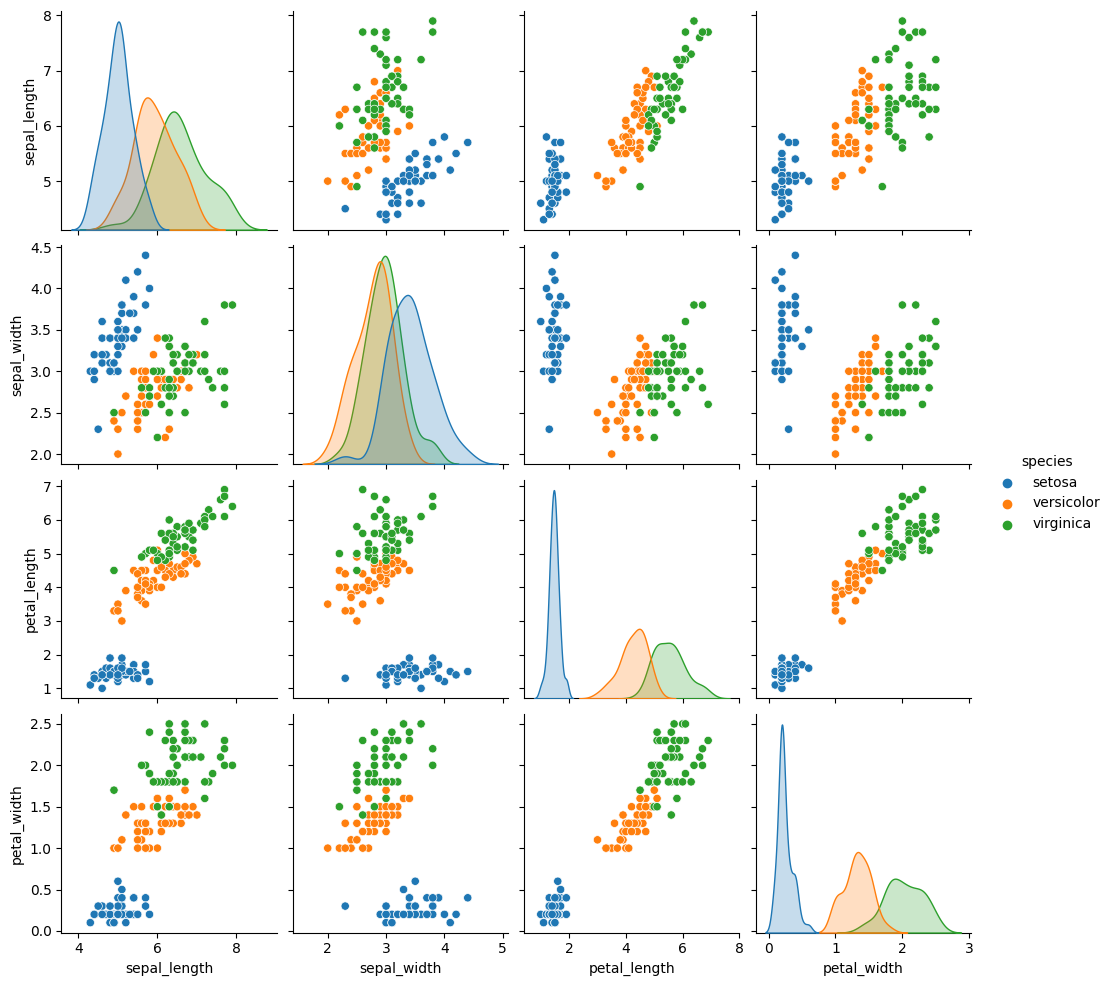

In [3]:
sns.pairplot(iris,hue='species')

### The linear algebra way
To process, let us separate the numeric columns and annotation column

In [4]:
A=iris.select_dtypes(np.number)
A

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
sps = iris['species']
sps

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Since the data in each columns are in different scales, let us normalize it to $\mu=0$ and $\sigma=1$. (Z-score)

In [6]:
A = (A-A.mean(axis=0))/(A.std(axis=0))
A

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


And look at correlation/covariance between the values of each pair of columns.

In [7]:
A_corr = A.corr()
A_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Let us get the eigenvalues and eigenvectors of this covariance matrix.

In [8]:
eval,evec = eig(A_corr)

Let us confirm that the eigenvalues are arranged in descending order, else we would have to sort them along with the corresponding eigenvector.

In [9]:
eval

array([2.91081808+0.j, 0.92122093+0.j, 0.14735328+0.j, 0.02060771+0.j])

We can think of these eigenvectors as the direction along which we are able to get the maximum (co-)variance.

In [10]:
evec

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

Now we can transform A onto these new basis vectors.

In [11]:
A_tr = A@evec

Now we have a new set of data where we can

In [12]:
A_tr

,0,1,2,3
0,-2.256981,-0.504015,-0.121536,0.022996
1,-2.079459,0.653216,-0.226492,0.102864
2,-2.360044,0.317414,0.051308,0.027732
3,-2.296504,0.573447,0.098530,-0.066090
4,-2.380802,-0.672514,0.021356,-0.037272
...,...,...,...,...
145,1.864277,-0.381544,0.253682,0.387592
146,1.553288,0.902291,-0.025297,0.220583
147,1.515767,-0.265904,0.178679,0.118506
148,1.371796,-1.012968,0.928295,0.024066


And rename the columns to PCs

In [13]:
A_tr.columns=['PC1','PC2','PC3','PC4']

Now we can add the annotation to our data

In [14]:
iris_tr = pd.concat((A_tr,sps),axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

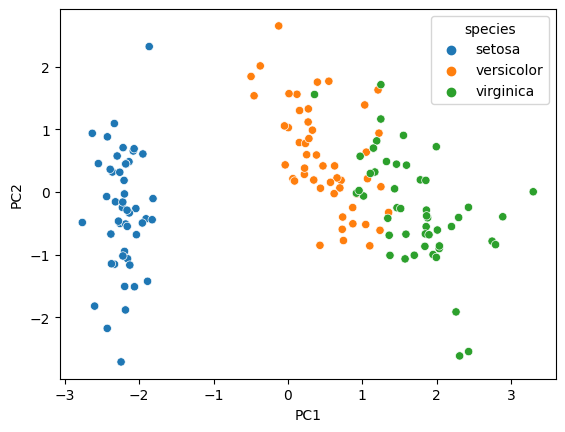

In [15]:
sns.scatterplot(iris_tr,x='PC1',y='PC2',hue='species')

### Using Sklearn

Instead of performing these steps we can directly use the PCA function provided in sklearn.

In [16]:
%pip install --user scikit-learn

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Let us get back our original data

In [18]:
A=iris.select_dtypes(np.number)
A

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


We can normalize the data with StandardScaler in sklearn

In [19]:
scaler=StandardScaler()

In [20]:
A = scaler.fit_transform(A)

Now we can perform PCA on this data

In [21]:
pca = PCA(n_components=2)

In [22]:
A_tr = pca.fit_transform(A)

Now we can put it in a dataframe

In [23]:
iris_tr = pd.DataFrame(A_tr,columns=['PC1','PC2'])
iris_tr = pd.concat((iris_tr,sps),axis=1)
iris_tr

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


<Axes: xlabel='PC1', ylabel='PC2'>

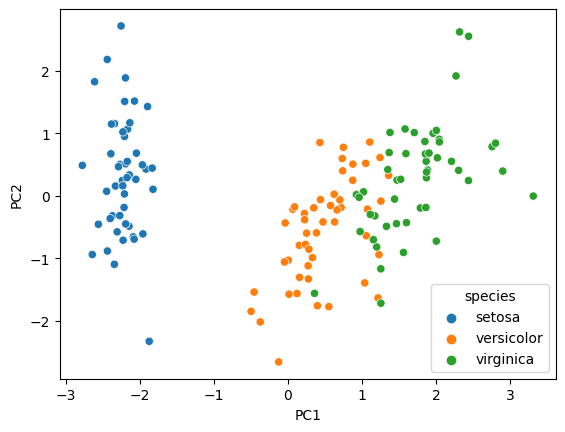

In [24]:
sns.scatterplot(iris_tr,x='PC1',y='PC2',hue='species')